In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

In [3]:
# Load the dataset
dataset = pd.read_csv('heart (1).csv')
print(dataset)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2   2     3       0  
1         0

In [4]:
# Splitting the dataset into the features and the target variable
X = dataset.iloc[:, 0:13].values
y = dataset.iloc[:, 13].values

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [5]:
# Preprocessing: Scaling the input data
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)  # Use transform instead of fit_transform for the test set

In [6]:
# Model: Naive Bayes
classifier = BernoulliNB()
classifier.fit(X_train, y_train)

BernoulliNB()

In [7]:
# Making predictions
y_pred = classifier.predict(X_test)

# Evaluating the model: Accuracy
print(f"Accuracy: {accuracy_score(y_pred, y_test)}")

Accuracy: 0.8443579766536965


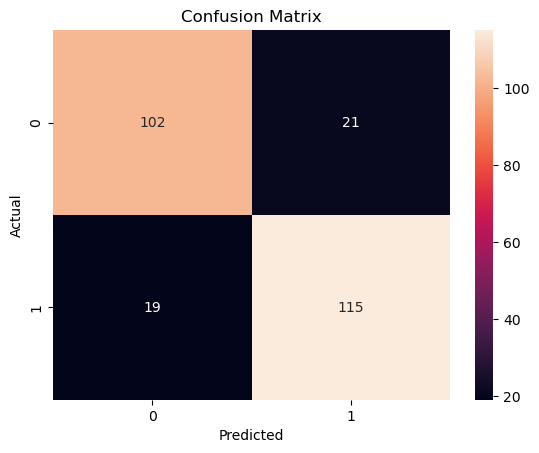

In [8]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('confusion.png')
plt.show()

In [9]:
# Ensemble: AdaBoost with Naive Bayes as the base estimator
nb = GaussianNB()
model = AdaBoostClassifier(base_estimator=nb, n_estimators=10)
model.fit(X_train, y_train)

# Making predictions with the ensemble model
ensemble_pred = model.predict(X_test)
print(f"Ensemble Model Accuracy: {accuracy_score(ensemble_pred, y_test)}")

Ensemble Model Accuracy: 0.26459143968871596


C:\Users\gokulan\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
